Clara Liff

In [1]:
#1

import scipy.io
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

J = scipy.io.loadmat('kcs.mat')['J']

J.shape

(110, 40)

In [2]:
#a

p=J.mean(axis=(0,1))
p

0.05068181818181818

0.8547509580679264

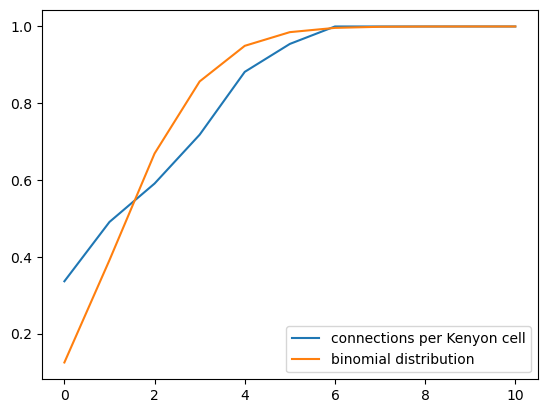

In [49]:
#b

conns = np.sum(J,1)
cdf_conns = []

for i in range(11):
    cdf_conns.append(np.sum(conns <= i,0)/len(conns))

# print(cdf_conns)
plt.plot(cdf_conns,label='connections per Kenyon cell')

#c

k = list(range(11))
from scipy.stats import binom

N = len(J[0])

plt.plot(binom.cdf(k,N,p),label='binomial distribution')
plt.legend();

from sklearn.metrics import r2_score
r2_score(cdf_conns,binom.cdf(k,N,p))


1c - Pretty good model of the data

In [4]:
#2
stimulus = scipy.io.loadmat('trace.mat')['stimulus']
print(stimulus.shape)

trace = scipy.io.loadmat('trace.mat')['trace']
print(trace.shape)

(27100, 1)
(27100, 35)


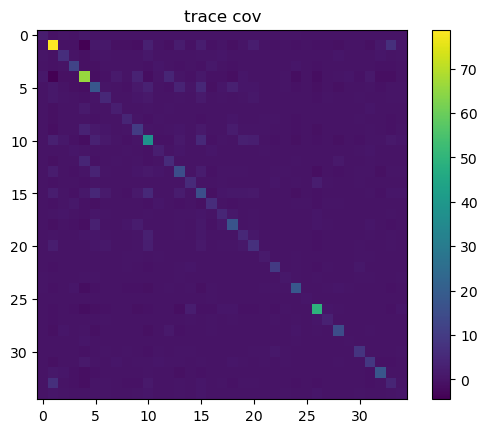

In [5]:
#a
fig, ax = plt.subplots()
plt.title('trace cov')
im = ax.imshow(np.cov(trace,rowvar=False))
plt.colorbar(im)

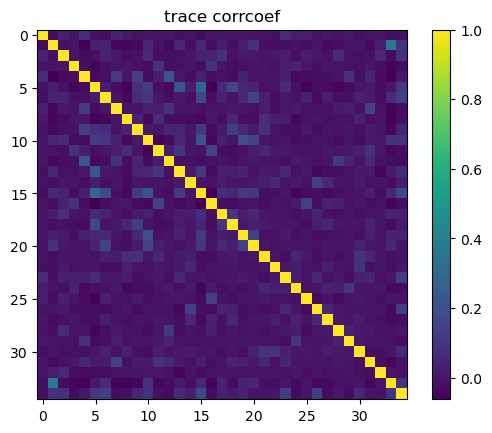

In [6]:
fig, ax = plt.subplots()
plt.title('trace corrcoef')
im = ax.imshow(np.corrcoef(trace,rowvar=False))
plt.colorbar(im)

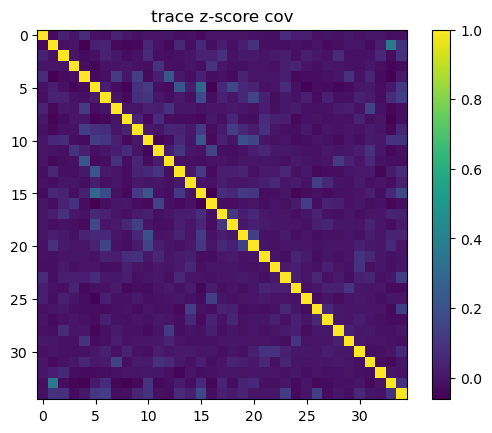

In [7]:
#b

trace_z = scipy.stats.zscore(trace)
fig, ax = plt.subplots()
plt.title('trace z-score cov')
im = ax.imshow(np.cov(trace_z,rowvar=False))
plt.colorbar(im)


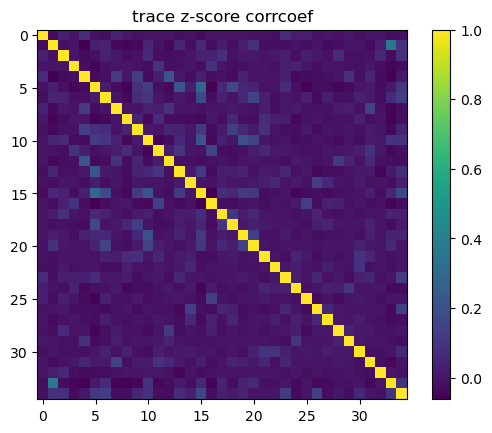

In [8]:
fig, ax = plt.subplots()
plt.title('trace z-score corrcoef')
im = ax.imshow(np.corrcoef(trace_z,rowvar=False))
plt.colorbar(im)

After z-scoring the covariance and correlation coefficient plots look the same

In [9]:
#c

# (n(n-1))/2

def unique_pairs_cov(cov_mat):
    num_cells = len(cov_mat[1])
    unique_pairs_cov = []
    for i in list(range(num_cells)):
        row_idx = i
        for j in list(range(i+1,num_cells)):
            # print(row_idx,j)
            unique_pairs_cov.append(cov_mat[row_idx,j])
    return unique_pairs_cov
    


In [16]:
cov_mat = (np.cov(trace,rowvar=False))
unique_pairs_cov(cov_mat)
# len(unique_pairs_cov(cov_mat))
# 35*34/2

[-0.39543113667328234,
 0.10793682519029411,
 -0.0033325862447663424,
 0.7855123327932976,
 -0.06586092880333654,
 -0.06963413930406924,
 0.08052563193865747,
 0.01581499596776434,
 -0.07057959323402331,
 0.02885418203591129,
 -0.01801962068205383,
 -0.014400817683347195,
 -0.11151331679387985,
 -0.030639032518238223,
 -0.17526103483722044,
 -0.019089248850875675,
 -0.020369451516137806,
 -0.004535811774555707,
 -0.019020078207869075,
 -0.04758010521529822,
 -0.022397773816553758,
 -0.08463980798445717,
 0.10297510559389328,
 0.1355415113910345,
 0.02409626250788188,
 -0.16710747725511893,
 -0.00845687588951466,
 -0.06704491193160753,
 0.0035356926965007,
 -0.05730347323560702,
 0.015072945634684056,
 0.010187900450390168,
 -0.06330563057445665,
 -0.019177004411904723,
 -0.3323547282376839,
 -0.23397431277959577,
 -4.458363761746019,
 1.0059670686236042,
 0.7827611110552496,
 -0.5713140483074616,
 -0.8421518604206278,
 -1.0824286040864153,
 2.802257355857726,
 -0.14853181118867667,
 -0

In [41]:
#d

stim_on = stimulus[stimulus != -1]

trace_z_stim_on = np.zeros(shape=(len(stim_on),35))
counter = 0
for i in range(len(stimulus)):
    if stimulus[i] != -1:
        trace_z_stim_on[counter,:] = trace_z[i,:]
        counter += 1


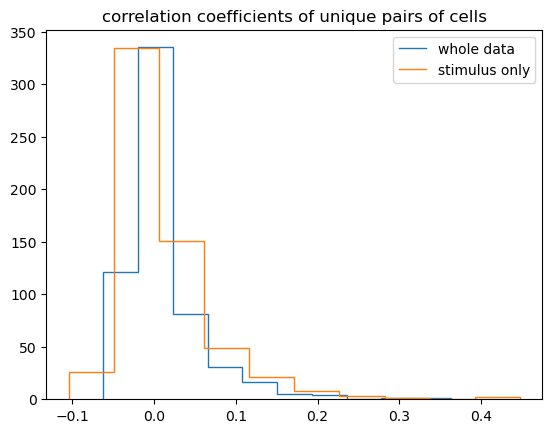

In [46]:
trace_z_corrcoef = np.corrcoef(trace_z,rowvar=False)
up_trace_z_corrcoef = unique_pairs_cov(trace_z_corrcoef)

counts, bins = np.histogram(up_trace_z_corrcoef)
plt.stairs(counts, bins, label='whole data')

trace_z_stim_on_corrcoef = np.corrcoef(trace_z_stim_on,rowvar=False)
up_trace_z_stim_on_corrcoef = unique_pairs_cov(trace_z_stim_on_corrcoef)

counts, bins = np.histogram(up_trace_z_stim_on_corrcoef)
plt.stairs(counts, bins, label='stimulus only')
plt.title('correlation coefficients of unique pairs of cells')
plt.legend();